# Notebook 3: Modeling Using Logistic Regression

In this notebook, I will be exploring the use of a Logistic Regression Model on my dataset. After using a countvectorizer to split my X variables into a dataframe of word counts, I will instantiate my model, fit it to a training split that I pickled in a previous notebook, and examine the coefficients of my predictions to see the 'predictive power' of each of them. 

With logistic regression, I am making certain assumptions about my data. I am assuming that my X variables are independent of one another, my errors in observing y are independent of one another, my distribution of errors will follow a Bernoulli distribution, and that my independent X variables are linearly related to the log-odds that Y = 1, my target class(ULPT). One of the assumptions that is interesting to me is the Independence of Independent Variables. Words are inherently meaningful based on the words that precede and succeed them. To split them up into completely independent variables changes the nature of language as humans understand it.  However, with this model, we will be looking at each individual word as its own predictor and see how we can combine different predictors to accurately predict our target class.

By looking at the nature of each individual word, we can examine how certain words are used in insincere or toxic posts, and whether or not there is an appropriate way to use those words in wholesome posts. If certain words, like 'cheat', 'revenge' don't have any weight in nontoxic posts, we will observe trends that lean towards one class when using these words. Even further, there could be predictive powers in the way people use pronouns. 'You', 'I', 'We', 'They' may all have different trends in usage between sincere, insincere, toxic, and wholesome posts.

Later in this notebook, I will be examining the strength of my model on an outside source, the [Kaggle Competition](https://www.kaggle.com/c/quora-insincere-questions-classification/data) that seeks to find insincere questions on quora. If my modeling tactics work as expected on my training data, I hope to see some good results on the Kaggle data. 

In [112]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

Importing my pickled stopwords, including my intersection of most common words from both classes in the previous notebook. 

In [14]:
with open('../assets/stopwords.pkl', 'rb') as f: #pickles adding columns back into 
    stopwords = pickle.load(f)

In [15]:
len(stopwords)

351

In [16]:
df = pd.read_csv('../data/df_clean.csv')

Reading in my pickled train test split.

In [17]:
with open('../assets/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('../assets/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('../assets/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('../assets/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [18]:
X_train.shape

(13182,)

In [19]:
y_train.shape

(13182,)

Instantiating my countvectorizor with my updated list of stopwords that include the intersection of the top 50 words used in each class. The intersection between the two classes totalled 33 words. This will create a matrix of each word as the columns and how many times they are used in the rows. 

In [20]:
cvec = CountVectorizer(stop_words = stopwords)

Fitting my countvectorizer to my corpus. 

In [21]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'make', 'how', 'back', 'whenever', 'youll', 'five', 'nine', 'whatever', 'behind', 'she', 'ourselves', 'hundred', 'me', 'money', 'amoungst', 'us', 'must', 'please', 'could', 'thin', 'might', 'free', 'ours', 'like', 'work', 'themselves', 'together', 'yourself', 'myself', 'full', ...'than', 'a', 'own', 'forty', 'that', 'thereafter', 'all', 'besides', 'had', 'became', 'everywhere'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Transforming my corpus. 

In [22]:
X_train_cvec = cvec.transform(X_train)

In [23]:
X_train_cvec

<13182x16003 sparse matrix of type '<class 'numpy.int64'>'
	with 128018 stored elements in Compressed Sparse Row format>

In [24]:
X_train_cvec.shape

(13182, 16003)

Looking at the top ten feature names alphabetically. 

In [25]:
cvec.get_feature_names()[:10]

['aa',
 'aah',
 'aampe',
 'ab',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abbreviate',
 'abbreviation']

There are some words that seem like giberish, like 'aa', or 'aah', or 'aampe', but I think these will be insignificant, and there are sure to be plenty of typos throughout the corpus. 

Looking at the size of my different matrices.

In [26]:
import sys

In [27]:
sys.getsizeof(X_train_cvec)

56

In [28]:
X_train_cvec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
sys.getsizeof(X_train_cvec.toarray())

1687612480

Creating a dataframe of my vectorized matrix of my training set with feature names as the columns.

In [30]:
X_train_df = pd.DataFrame(X_train_cvec.toarray(), columns = cvec.get_feature_names())

In [31]:
X_train_df.shape

(13182, 16003)

Repeating the above process on my test set, (validation set).

In [32]:
X_test_cvec = cvec.transform(X_test)

Creating a dataframe of my vectorized matrix of my training set with feature names as the columns.

In [33]:
X_test_df = pd.DataFrame(X_test_cvec.toarray(), columns = cvec.get_feature_names())

Instantiating my logistic regression model. Using a solver of 'liblinear' as my dataset isn't huge. 

In [34]:
lr = LogisticRegression(solver = 'liblinear')

Fitting my training sets to my logistic regression model. 

In [108]:
lr.fit(X_train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Scoring  my training set with my logreg model.

In [36]:
lr.score(X_train_df, y_train)

0.9428766499772417

94% accuracy is pretty great for my logistic regression model. I am expecting my model to be overfit, as I am working with classification, but if my validation set can show some significant accuracy then we are in a good place.

Scoring my testing set with my logreg model. 

In [37]:
lr.score(X_test_df, y_test)

0.7808375056895767

As we can see, my model is overfit. With any classification problem, though, the model is likely to be overfit. An accuracy of 78% in my training set is still 28% better than my baseline accuracy of 50%.

Taking a look the logreg coefficients. 

In [38]:
lr.coef_

array([[ 0.36715671,  0.0006783 ,  0.41831816, ...,  0.00088588,
        -0.19384018, -0.05381887]])

Setting my coefficients to a dataframe with the columns set as the columns of my countvectorized training dataframe. 

In [39]:
coef_weights = pd.DataFrame(lr.coef_[0], 
                               X_train_df.columns, 
                               columns=['importance'])

Plotting the top 20 words that 

Plotting the top 20 features that have the give the most information to my model. 

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 <a list of 8 Text xticklabel objects>)

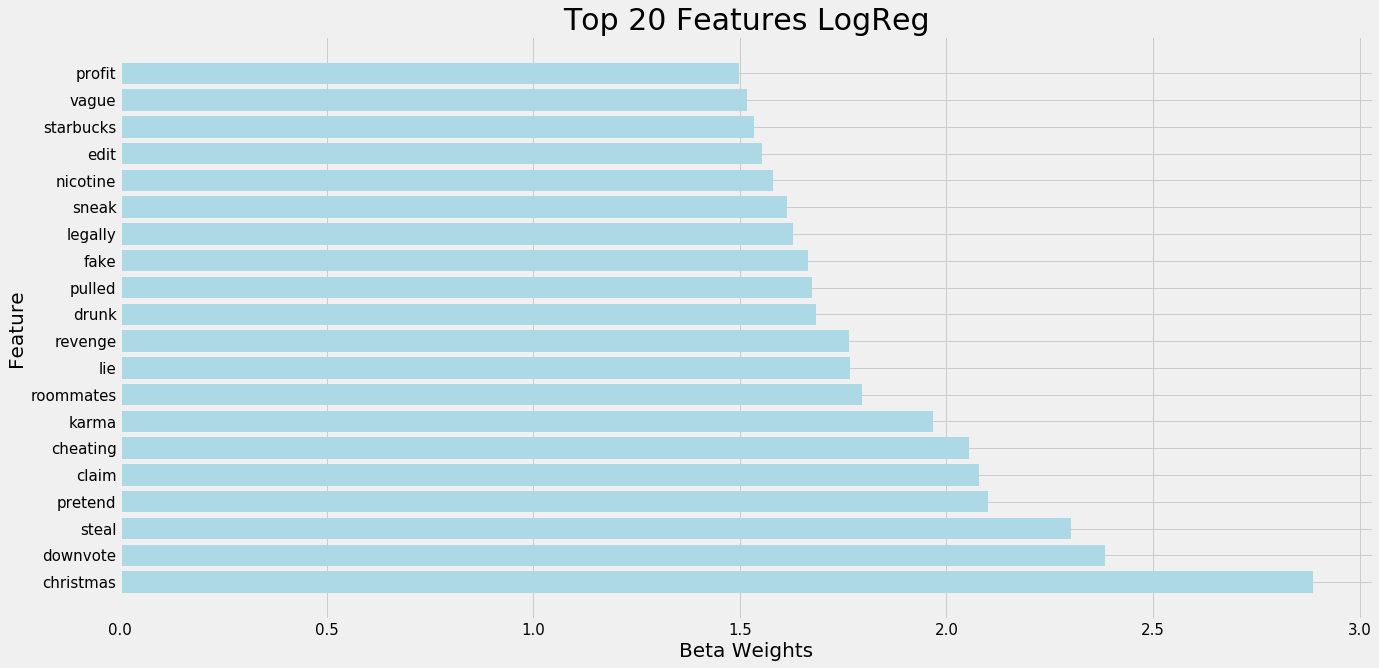

In [114]:
plt.figure(figsize=(20,10))
temp = coef_weights.sort_values('importance', ascending=False).head(20)
plt.barh(temp.index, temp['importance'], color = 'lightblue')
plt.title('Top 20 Features LogReg', fontsize=30)
plt.xlabel('Beta Weights', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

Looking at the above graph, there are some obvious words that would seem to give more information to my target class, 'UnethicalLifeProTips'. These include words like cheating, drunk, eavesdrop, steal, lie, fake, downvote. Some less obvious words include christmas, pretend, legal, excuse, shell, profit, silence, cops. These words are interesting to me, as some of them can be put into context that would give a lot of predictive power to my non target class. We will take a further look into the importance of these words further down.

Looking at the predicted probabilities of my countvectorized dataframe.

In [42]:
pred_probas = lr.predict_proba(X_test_df)

Getting the probabilities of my target class. 

In [43]:
ulpt_preds = pred_probas[:,1]

Looking at the target class the percentage out of total posts when it is above 80% sure that it is predicting the correct class. 

In [44]:
(ulpt_preds > .8).mean()

0.2687756030951297

Looking at the target class and when my model was less than 20% positive it was predicting the target class. This represents the percentage of posts that were above 80% in predicting the 0 class. 

In [45]:
(ulpt_preds < .2).mean()

0.26718252162039147

Below, we can see that about 7% of our posts sit around 50%, which is a good indicator that our model wasn't unsure about very many posts when it was classifying. We will take a look at some of these posts below. 

In [46]:
((.45 < ulpt_preds) & (ulpt_preds < .55)).mean()

0.07487482931269913

Looking at the actual posts that my model was predicting with less than 20% probability to the target class.

In [99]:
X_test.iloc[np.argwhere((ulpt_preds < .2))[:, 0]].head()

9424     to stop hiccups simply keep your ears shut by ...
3548     transition from daytoevening  create relaxatio...
7232     put on your socks first before you put your pa...
14795    dont know how to pronounce worcestershire sauc...
6504     hey mckinney heres your weekly list of fun upc...
Name: title, dtype: object

In [161]:
df.iloc[9424]['title']

'to stop hiccups simply keep your ears shut by applying pressure on them with your fingers for about  seconds'

In [162]:
df.iloc[7232]['title']

'put on your socks first before you put your pants on its way easier than the other way around'

Looking at the above 2 posts, we can see that they don't have any of the top featured words that have the most weight. These are wholesome posts, without any negative sentiment or toxic intent. It is apparent why these wouldn't be put in the target class, ULPT. 

In [49]:
X_test.iloc[np.argwhere((.45 < ulpt_preds) & 
                        (ulpt_preds < .55))[:, 0]]

7605     always check your cell phone signal when looki...
3189     if you have a friend who is starting a new bus...
5963     youtubes discriminatory new policies are destr...
708      when joining a restaurant site use your annive...
10397      save money on your internet bill by using a vpn
16004    if youre insecure about your height add an inc...
2249     you dont have to be friends with people you do...
1291     are there any legal and ethical reasons to use...
5197     give your used subway ticket to anyone you see...
9589     want to save an image from a docx or pptx chan...
3411     if youre looking at reviews on a site like ama...
14455    you can make folders for your playlists on spo...
3283     if you get a chaser email after contacting cus...
6295     if you have good credit and are buying an enga...
8837     if youre adding candy to gifts buy big bags of...
7417     if you make a change in your daily routine to ...
15349    if you move into a new home and plan on doing .

LPT within 45-55%

In [51]:
X_test.loc[12410]

'build a dummy site that looks exactly like reddit and send emails to all the mods telling them they need to log in right away thus get the login and password of the mod that took down my last post and then pm me and ill pay you for it in bitcoin cheers'

LPT but within 45-55%

In [52]:
X_test.loc[4491]

'if youre a guy whos dating  girls and couldnt decide which one to be in a relationship with all you gotta do is masturbate and the one that you longed more for right after ejaculation means you want her more beyond sex'

Unethical but within 45 - 55%

In [55]:
X_test.loc[6081]

'if you are attending a small event you have to pay to enter and the exits have little security just walk in through the exit and and ignore anyone that tries to stop you'

In [58]:
X_test.loc[1520]

'balance windshield wipers by there tips on your windshield after you park it will prevent them from icing over or freezing to your windshield'

Unethical but within 45-55%

In [60]:
X_test.loc[4098]

'want to see more college girls wearing yoga pants write an opinion piece as a catholic mother urging them to think about how theyre making it hard to ignore for the boys'

LPT but within 45-55%.

In [62]:
X_test.iloc[3853]

'play a game with your kiddos while driving whoever spots the most motorcycles wins everyone will be naturally more aware of bikers on the road saving lifes'

Unethical but within 45-55%.

In [140]:
df.iloc[16532]['title']

'if someone tells you to do something at work that you dont think you should do rather than argue about it just say you did it'

From the above posts, it's clear why a model may not be able to accurately predict which class they are in. The language, word for word, is not necessarily toxic, even if the context is insincere and inappropriate. I expected to see posts like this, as the toxicity and insincerity of given posts can be interpretted from the context, but not from the word usage.

Going to look at the percentages of each beta weight and how often that word is present in a post that is classified as toxic.

In [115]:
percent_list = []
for i in list(temp.index):
    print(round(df[df["title"].str.contains(i)]["subreddit"].mean(),2)*100, 
          f'percent of the posts with the word "{i}" point towards the target class') 
    percent_list.append(round(df[df["title"].str.contains(i)]["subreddit"].mean(),2)*100)

97.0 percent of the posts with the word "christmas" point towards the target class
91.0 percent of the posts with the word "downvote" point towards the target class
92.0 percent of the posts with the word "steal" point towards the target class
88.0 percent of the posts with the word "pretend" point towards the target class
89.0 percent of the posts with the word "claim" point towards the target class
98.0 percent of the posts with the word "cheating" point towards the target class
94.0 percent of the posts with the word "karma" point towards the target class
90.0 percent of the posts with the word "roommates" point towards the target class
64.0 percent of the posts with the word "lie" point towards the target class
96.0 percent of the posts with the word "revenge" point towards the target class
87.0 percent of the posts with the word "drunk" point towards the target class
89.0 percent of the posts with the word "pulled" point towards the target class
90.0 percent of the posts with the 

In [116]:
temp['percent'] = percent_list

In [117]:
temp.sort_values('percent', ascending = False)

,importance,percent
vague,1.517596,100.0
cheating,2.053673,98.0
christmas,2.887355,97.0
revenge,1.763496,96.0
profit,1.497382,96.0
karma,1.966843,94.0
steal,2.301506,92.0
downvote,2.384447,91.0
roommates,1.796497,90.0
fake,1.664478,90.0


Plotting the top 20 words and how often the target class was predicted when these words were in the post. 

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

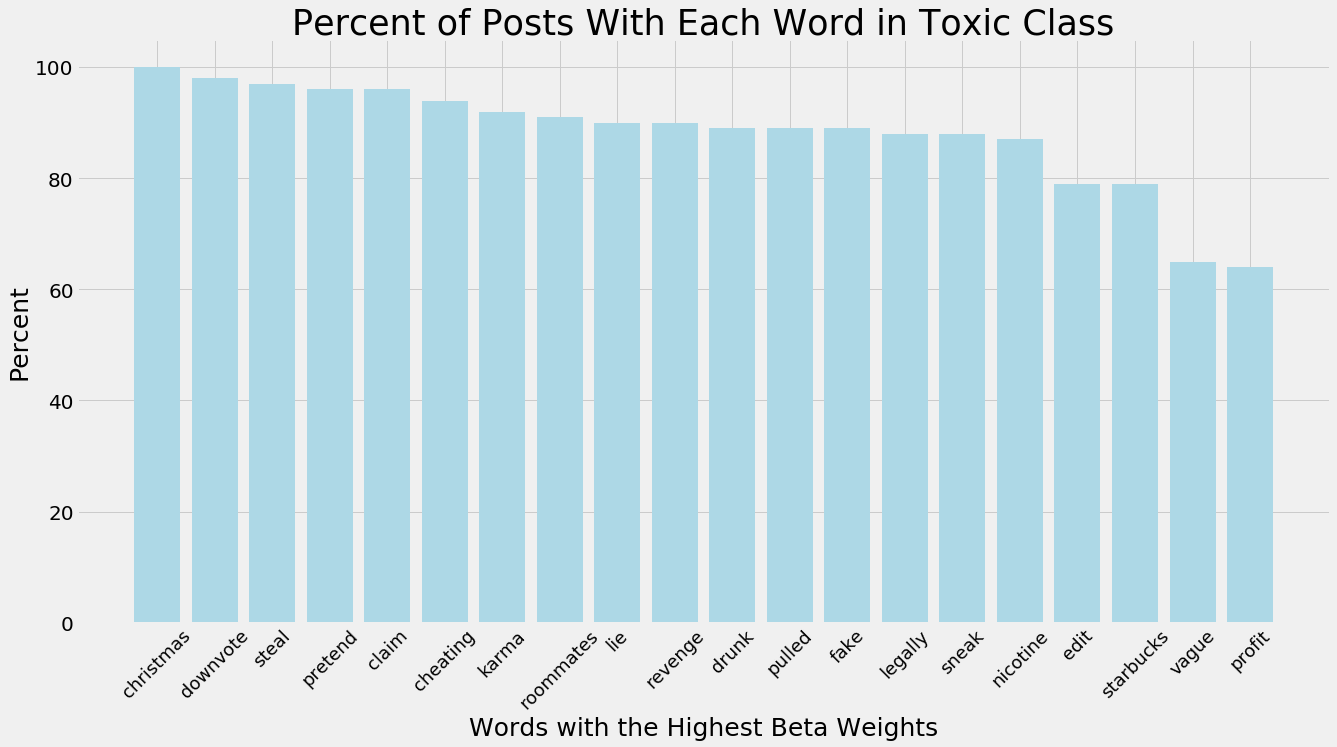

In [119]:
plt.figure(figsize = (20,10))
plt.bar(x=temp.index, 
        height = temp['percent'].sort_values(ascending = False),
        color = 'lightblue')
plt.xlabel(xlabel = 'Words with the Highest Beta Weights', fontsize = 25)
plt.ylabel(ylabel = 'Percent', fontsize = 25)
plt.title('Percent of Posts With Each Word in Toxic Class', fontsize = 35)
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 20)

The above graph shows the percentages of posts that have been classified as the target class given a certain word is in it. 100% of the posts about christmas were attributed to the target class, which seems to me that the data for the target class is a bit older, or that people use the holidays as a time to post toxic things about how to take advantage of people and services. Words like steal, lie, revenge, and legally all seem to be pretty accurate predictor words for toxic or unethical posts.

Wondering how many posts these 20 words have been in all together. 

In [120]:
count = 0
for i in list(temp.index): 
    count += df[df['title'].str.contains(i)]['title'].count()

In [121]:
count

2446

While these words are powerful in predicting the target class, they are only present in about 1/8 of the total posts, meaning that when they aren't in the post, the model has to rely on other words.

### Importing Kaggle Quora Data

Below, I will be running kaggle data from quora to determine whether or not certain posts are insincere or toxic. This is a way to 'grade' the accuracy of my model on outside data.

In [82]:
df_kaggle = pd.read_csv('../data/kaggle_insincere.csv')

In [83]:
df_kaggle.shape

(1306122, 3)

In [84]:
df_kaggle.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

The kaggle data is extremely unbalance. I will balance the classes so that my baseline is 50%. The target class will be 'insincere' or 1.

In [85]:
df_kaggle_insincere = df_kaggle[df_kaggle['target'] == 1]

In [86]:
df_kaggle_insincere.shape

(80810, 3)

In [87]:
df_kaggle_sincere = df_kaggle[df_kaggle['target'] == 0]

Below, I will decrease the size of my kaggle set to 5000 insincere posts and 5000 sincere posts.

In [88]:
df_kaggle_insincere.index = range(len(df_kaggle_insincere['target']))

In [89]:
df_kaggle_insincere.drop(df_kaggle_insincere.index[:75810], inplace = True)

In [90]:
df_kaggle_sincere.index = range(len(df_kaggle_sincere['target']))

In [91]:
df_kaggle_sincere.shape

(1225312, 3)

In [92]:
df_kaggle_sincere.drop(df_kaggle_sincere.index[:1220312], inplace = True)

In [93]:
df_kaggle_sincere.shape

(5000, 3)

Concatenating the two dataframes into one.

In [94]:
df_kaggle = pd.concat([df_kaggle_insincere, df_kaggle_sincere])

In [95]:
df_kaggle.index = range(len(df_kaggle['target']))

In [96]:
df_kaggle.target.value_counts(normalize = True)

1    0.5
0    0.5
Name: target, dtype: float64

Below I will clean the data before pushing it through my countvectorizer and logreg model.

In [97]:
df_kaggle['question_text'] = df_kaggle['question_text'].str.lower()

In [98]:
df_kaggle['question_text'] = df_kaggle['question_text'].apply(lambda x: re.sub('([^a-zA-Z ]|aaa)', '', x))

In [105]:
X = df_kaggle['question_text']
y = df_kaggle['target']

Transforming my data to my already instantiated Count Vectorizer

In [106]:
X_cvec = cvec.transform(X)

Scoring my already fitted logreg model on the Kaggle data.

In [109]:
lr.score(X_cvec,y)

0.5986

Considering my data all came from reddit and my model was able to predict with an increase of 10% from my baseline model, I think this model is pretty good. 60% isn't a great score, but with a dataset this small, that doesn't encompass all words used in the english language, I think it does a pretty effective job at predicting insincerity and toxicity. Next steps would definitely be to combine reddit posts and quora questions to create a wider range of vocabulary to train my model with.

Pickling my kaggle data so I can run it on a random forest model in the next notebook.

In [110]:
with open('../assets/X_kaggle.pkl', 'wb+') as f:
    pickle.dump(X, f)
with open('../assets/y_kaggle.pkl', 'wb+') as f:
    pickle.dump(y, f)

### Conclusions and Next Steps

While this score isn't amazing, it is 10% more accurate than my baseline model. I think this says something about the words used in insincere and toxic posts. My original data was about 17k posts from reddit, and scored around 79% accuracy. Given that a model trained on that small of a dataset was used on a completely unrelated dataset and scored 60% is worth noting. This validates my model as a decent predictor of toxic and insincere online activity. I think my next step would be to combine reddit and quora posts and use more data to really examine word usage and how those words can predict toxic behavior online. If using more data can increase my models predictive power, perhaps social media sites and online forums can use it to track toxicity and users who display such behavior. 

In my next notebook, I will be examining random forest and how it deals with my dataset. I think It will outperform logistic regression, but I think it won't be as interpretable. 